In [1]:
import sys
import pandas as pd
sys.path.append("C:/Users/User/ReposMine/")
from fpca import ModelFPCA
import matplotlib.pyplot as plt
%matplotlib inline

### Upload the data for ivs

In [2]:
folder = "C:/nes/Options_data/"
data = pd.read_hdf(folder + 'data_ivs.h5')
data.head(2)

,date,days,imp_vol,strike,premium,maturity,call,price,riskfree,rate,lfmoneyness,moneyness
7,1996-01-10,30,0.142568,597.5253,8.515888,0.082192,False,598.47998,6.366438,2.510953,-0.524865,0.998405
8,1996-01-10,30,0.145550,594.3030,7.298738,0.082192,False,598.47998,6.366438,2.510953,-0.530273,0.993021


### Initialize the model

In [3]:
model = ModelFPCA(data, for_logs=False, for_delta=False)
model_delta = ModelFPCA(data, for_logs=False, for_delta=True)

### Set up the params and load precomputed integrals

In [4]:
model.set_params()
model_delta.set_params()

In [5]:
model.load_integs()
model_delta.load_integs()

### Compute smoothers

In [6]:
model.compute_smoothers_and_basis()
model_delta.compute_smoothers_and_basis()

### Set model range 

In [7]:
st_date = model._all_dates[560]
e_date = model._all_dates[780]

model.set_range(from_start=False, st_date=st_date, end_date=e_date)
model_delta.set_range(from_start=False, st_date=st_date, end_date=e_date)
print('first day of range: ', st_date) 
print('last day of range: ', e_date)

first day of range:  2006-11-15T00:00:00.000000000
last day of range:  2011-02-09T00:00:00.000000000


### Check in-sample fit quality

In [8]:
dat = model._frame_dates[100]
fit = model.in_sample_fit(dat, n_comps=5)
metrics = ['mape', 'mae', 'rmse']

model.assess_fit_quality(dat, fit, metric=metrics)

# 5.7 % for day=dat

[0.056560011178930877, 0.02986806072157128, 0.047709771353268864]

In [9]:
fit_delta = model_delta.in_sample_fit(dat, n_comps=3)
model_delta.assess_fit_quality(dat, fit_delta, metric=metrics)

# 3 %, delta-model

[0.029322088303530825, 0.014275249855221646, 0.018645992234467092]

### PC plots

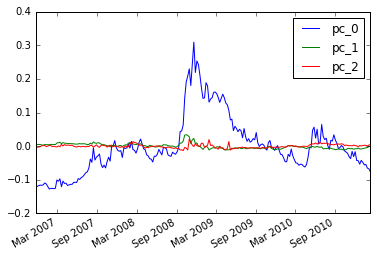

In [10]:
model.pc_series_sq_normalized[['pc_0', 'pc_1', 'pc_2']].plot()

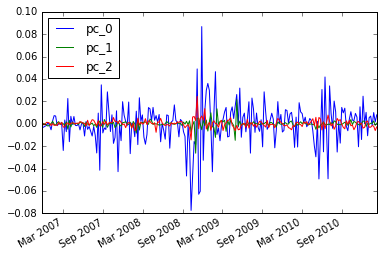

In [11]:
model_delta.pc_series_sq_normalized[['pc_0', 'pc_1', 'pc_2']].plot()